# Waze User Churn Project

## **Exploratory Data Analysis**

**The purpose** of this Notebook is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to examine the data and add relevant visualizations that help communicate the story that the data tells.
<br/>

This notebook has 4 parts:
- **Part 1:** Imports, links, and loading dataset
- **Part 2:** Data Exploration
    - Data cleaning (imputation)
- **Part 3:** Building visualizations
- **Part 4:** Conclusions

## **1. Imports and data loading**

And initial data orientation ie. `.info()`, `.describe()`

In [3]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("bright")

In [4]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')
df.shape

(14999, 13)

In [9]:
df.size

194987

In [5]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [10]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The target variable is the `label` column and as shown above it has 700 missing values which must be removed.

In [6]:
# Remove rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## 2. EDA

### Helper Functions

In [7]:
# Helper functions for plotting graphs

def make_boxplot(df, col):
    """Accepts a dataframe and a column to create a boxplot"""
    plt.figure(figsize=(7,1))
    sns.boxplot(x=df[col], fliersize=1)
    plt.title(col+' box plot');

def make_hist(df, col, bins=None, median_lbl_pos=None):
    """Accepts a dataframe and a column to create a histogram"""
    plt.figure(figsize=(7,4))
    if bins:
        sns.histplot(data=df, x=col, bins=bins)
    else:
        sns.histplot(data=df, x=col, bins=20)
    median = df[col].median()
    if median_lbl_pos:
        plt.text(median_lbl_pos[0],median_lbl_pos[1], f'median={median}', color='red',  ha='left', va='top')
    else:
        val_counts = df[col].value_counts().sort_values(ascending=False).head(25).sum()
        plt.text(85,val_counts, f'median={median}', color='red',  ha='left', va='top')
    plt.axvline(median, color='red', linestyle='--')
    plt.title(col+' histogram');

def make_piechart(df, name):
    plt.figure(figsize=(4,4))
    plt.pie(np.concatenate(df.values), labels=df.index, autopct='%1.1f%%')
    plt.title(name+' Pie Chart');

### Individual Column Investigation

#### **`sessions`**

_The # of times a user opens the app during the month_

- The histogram shows it is right-skewed distribution where half of the users have 56 sessions or less.  
- The boxplot shows there are users that have 700+ sessions.  

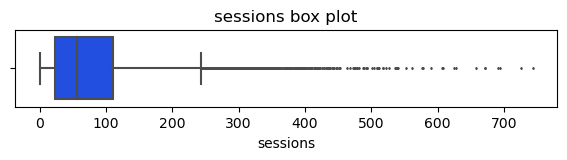

In [8]:
# Box plot
make_boxplot(df, "sessions")

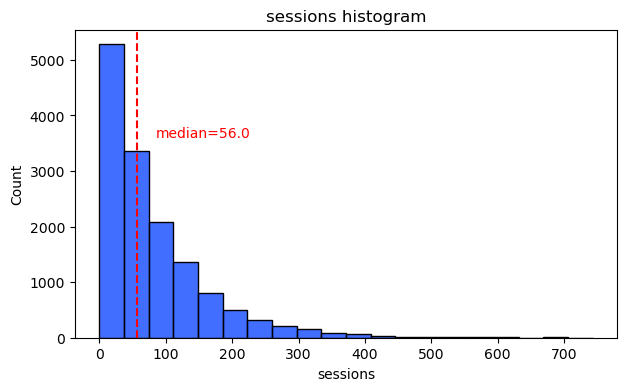

In [9]:
# Histogram
make_hist(df,"sessions")

#### **`drives`**

_# of times a user drives at least 1 km during the month_  

- The histogram shows it is right-skewed distribution where half of the users have 48 drives or less.
- The boxplot shows there are users that have 500+ drives in the month.

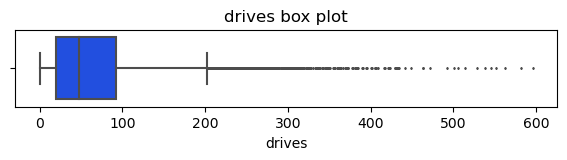

In [10]:
# Box plot
make_boxplot(df, "drives")

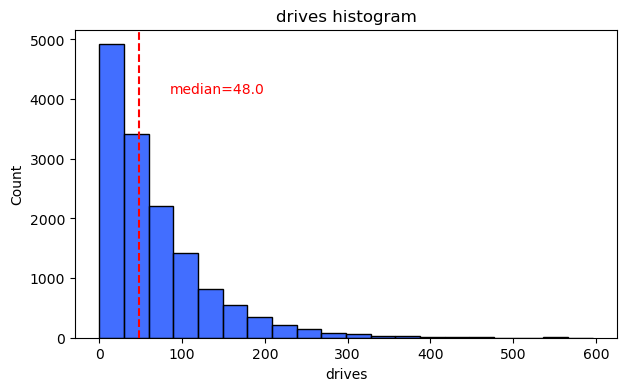

In [11]:
# Histogram
make_hist(df, "drives")

#### **`total_sessions`**

_The total # of sessions a user had since onboarding_  

- The histogram shows it is right-skewed distribution where half of the users have 158 sessions or less.
- The boxplot shows there are users that have over 1,200 total sessions.

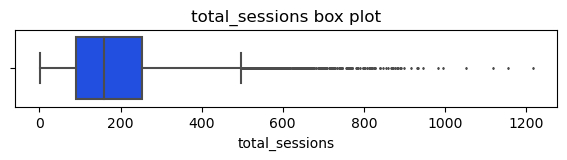

In [12]:
# Box plot
make_boxplot(df, "total_sessions")

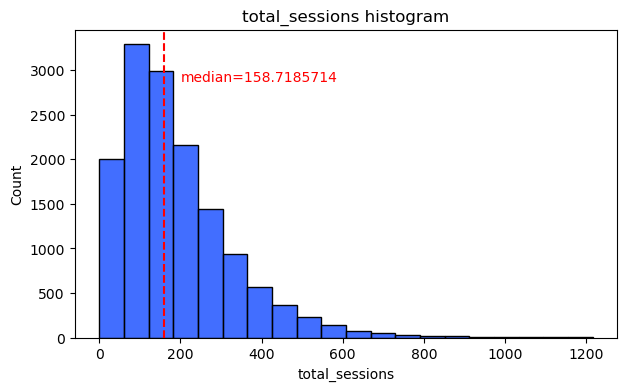

In [13]:
# Histogram
make_hist(df,"total_sessions", median_lbl_pos=[200,3000])

#### **`n_days_after_onboarding`**

_# of days since a user signed up_  

- The histogram shows it is a uniform distribution where half of the users were onboarded for 1749 or less days.
- The boxplot shows the range is between 0 and 3,500.

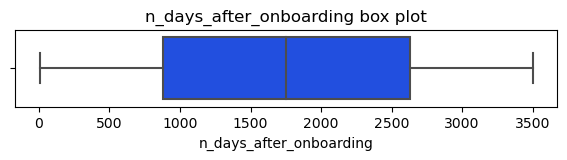

In [14]:
# Box plot
make_boxplot(df, "n_days_after_onboarding")

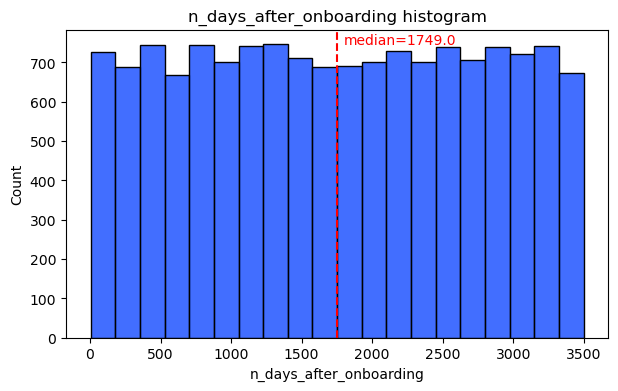

In [15]:
# Histogram
make_hist(df, "n_days_after_onboarding", median_lbl_pos=[1800, 775])

#### **`driven_km_drives`**

_Total kilometers driven in the month_  

- The histogram shows it is right-skewed distribution where half of the users have driven ~3,496.5 kilometers or less.
- The boxplot shows there are users that have driven 20,000+ kms in the month.

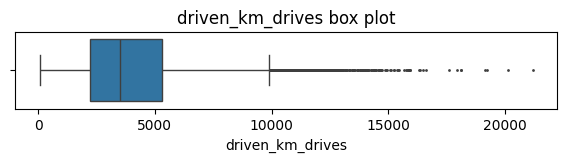

In [113]:
# Box plot
make_boxplot(df, "driven_km_drives")

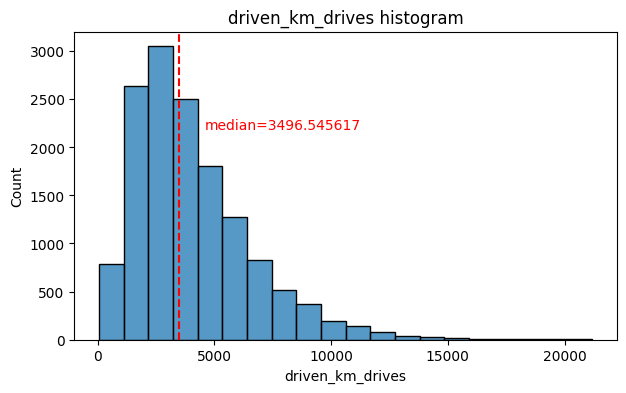

In [19]:
# Histogram
make_hist(df, "driven_km_drives", median_lbl_pos=[4600, 2300])

#### **`duration_minutes_drives`**

_Total time driven (in minutes) during the month_  

- The histogram shows it is right-skewed distribution where half of the users have driven for ~1,479 mins or less.
- The boxplot shows there are users that have driven for ~16,000 mins in the month.

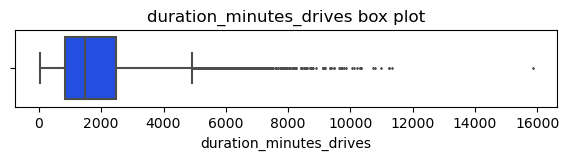

In [16]:
# Box plot
make_boxplot(df, "duration_minutes_drives")

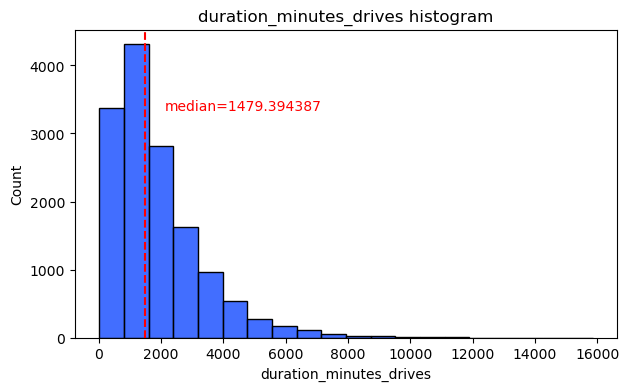

In [17]:
# Histogram
make_hist(df, "duration_minutes_drives", median_lbl_pos=[2100, 3500])

#### **`activity_days`**

_# of days a user opens the app during the month_  

- The histogram shows it is a uniform distribution where half of the users have opened the app 16 days or less. About 250 people didn't open the app at all in the month and about 250 that opened the app every day of the month.
- The boxplot shows that the range is between 0 and 31.

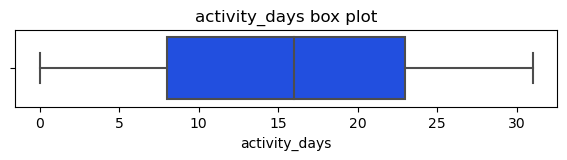

In [22]:
# Box plot
make_boxplot(df, "activity_days")

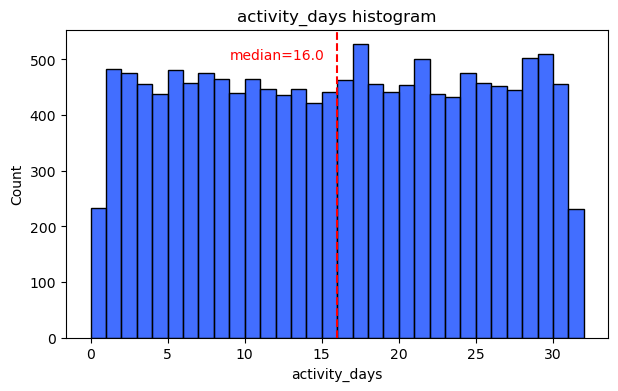

In [21]:
# Histogram
make_hist(df, "activity_days", bins=range(0, 33), median_lbl_pos=[9, 520])

#### **`driving_days`**

_# of days the user drives (at least 1 km) during the month_  

- The histogram shows it is _almost_ a uniform distribution where half of the users drives 12 days or less in the month. There is almost 1000 users that don't drive at all during the month (which is almost twice as many as the `activity_days`). 
- The boxplot shows the range is between 0 and 30. This is different from `activity_days` which may imply that the data is referring to 2 different months.

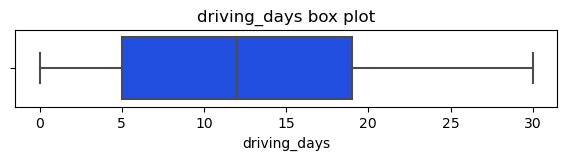

In [23]:
# Box plot
make_boxplot(df, "driving_days")

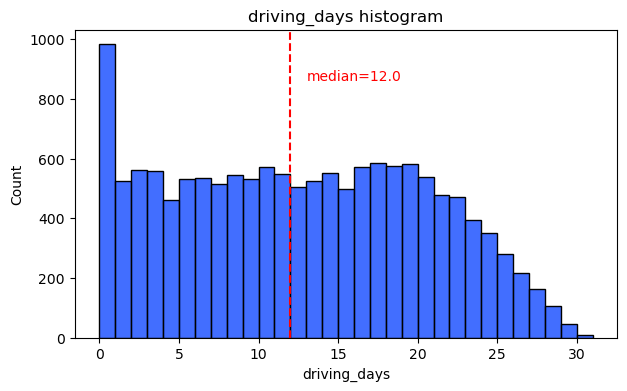

In [25]:
# Histogram
make_hist(df,"driving_days", bins=range(0, 32), median_lbl_pos=[13, 900])

#### **`device`**

_The type of device a user starts a session with_

- There's almost 2 times as many iPhone users than Android.  

In [10]:
devices = df[["ID", "device"]].groupby("device").count()
devices

,ID
device,
Android,5074
iPhone,9225


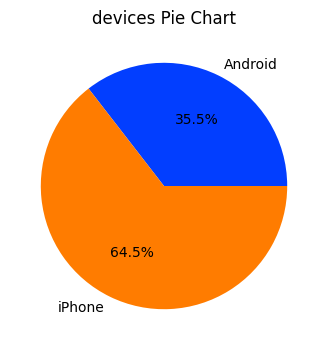

In [11]:
# Pie chart
make_piechart(devices, "devices")

#### **`label`**

_Binary target variable (“retained” or “churned”)_   
_is “churned” if a user churned anytime during the month_
_is “retained” if a user did not churn during the month_

- Less than 18% of users churned in the month.

In [110]:
label_df = df[["ID", "label"]].groupby("label").count()
label_df

,ID
label,
churned,2536
retained,11763


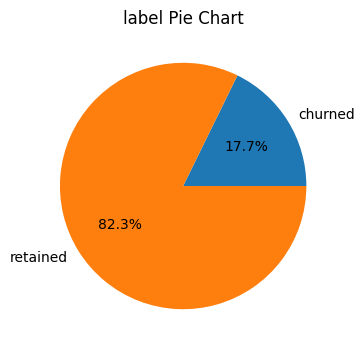

In [114]:
# Pie chart
make_piechart(label_df, "label")

### Comparing Columns

#### **`driving_days` vs. `activity_days`**

Initially, it is counterintuitive to have much more users driving 0 days a month than users using the app 0 days since driving requires the use of the app. This could be explained by users opening the app by accident, checking routes or traffic, or updating settings, but not using the app while driving.  

What's more concerning is that the columns have different max values (30 vs 31), implying these columns are referring to different months. 

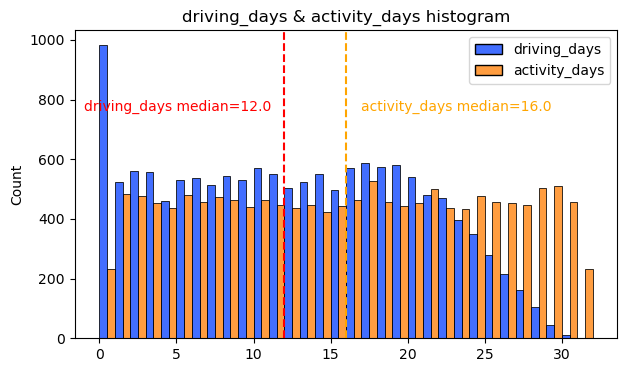

In [26]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(data=df[["driving_days", "activity_days"]], bins=range(0,33), multiple="dodge")

median_dd = df["driving_days"].median()
plt.text(-1,800, f'driving_days median={median_dd}', color='red',  ha='left', va='top')
plt.axvline(median_dd, color='red', linestyle='--')

median_ad = df["activity_days"].median()
plt.text(17,800, f'activity_days median={median_ad}', color='orange',  ha='left', va='top')
plt.axvline(median_ad, color='orange', linestyle='--')

plt.title('driving_days & activity_days histogram');

Checking the max value for each col&mdash;`driving_days` and `activity_days`.

In [48]:
print("Max driving days value: ", df["driving_days"].max())
print("Max activity days value: ", df["activity_days"].max())

Max driving days value:  30
Max activity days value:  31


#### **Scatter plot of `driving_days` vs. `activity_days`**

We see that there is data points where `driving_days` > `activity_days`. This makes sense since if a user is recorded as driving in the `driving_days` they must use the app which would be recorded in the `activity_days` column.

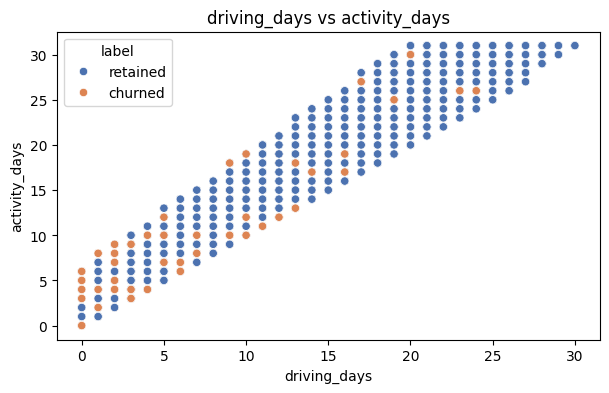

In [55]:
# Scatter plot
plt.figure(figsize=(7,4))
ax = sns.scatterplot(data=df, x="driving_days", y="activity_days", hue='label', palette="deep")
sns.move_legend(ax, "upper left")
plt.title('driving_days vs activity_days');

#### **Retention by device**

The proportion of churned to retained users is consistent between iPhone and Android users.

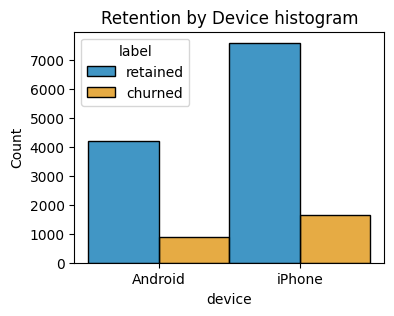

In [13]:
# Histogram
plt.figure(figsize=(4,3))
sns.histplot(data=df, x="device", hue="label", multiple="dodge", palette="colorblind")
plt.title('Retention by Device histogram');

#### **New Column:** kilometers driven per driving day

It looks like users who churn drive longer distances than those who don't. We will investigate this further by creating a new column for the average distance driven per day of driving.

In [16]:
# 1. Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"]

# 2. Call `describe()` on the new column
df["km_per_driving_day"].describe()

/home/rsbaher/anaconda3/envs/intro/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean of this column is infinity because some users did not drive at all in the month. We can fix this by just replacing the infinite values with 0.

In [17]:
# 1. Convert infinite values to zero
df["km_per_driving_day"] = df["km_per_driving_day"].replace({np.inf: 0})

# 2. Confirm that it worked
df[df["driving_days"] == 0]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
13,13,retained,80,64,132.830506,3154,39,16,8531.248070,6324.273457,1,0,Android,0.0
14,14,churned,72,66,401.351809,2524,54,24,5922.811202,2227.280393,0,0,Android,0.0
56,56,churned,150,127,187.708346,2028,208,132,1396.461977,496.620891,0,0,iPhone,0.0
64,64,retained,4,3,113.818787,1830,233,0,9624.439528,3213.049582,6,0,Android,0.0
81,81,churned,26,23,83.166886,2118,335,0,944.204641,455.026306,2,0,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,14881,retained,174,151,181.187455,2255,103,31,2647.541976,561.344796,2,0,iPhone,0.0
14957,14957,retained,24,24,42.953281,762,17,0,1466.793380,597.834311,2,0,Android,0.0
14985,14985,churned,53,43,118.385655,65,23,49,1661.143357,1161.205518,4,0,iPhone,0.0
14988,14988,churned,13,11,41.804981,770,132,87,1533.521450,823.418616,0,0,Android,0.0


In [72]:
df["km_per_driving_day"].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per driving day_ which is not possible. If this individual was to theoretically drive for 24 hrs and averaged a speed of 150 km/h that would be 3,600 km. Its more likely for someone to drive for 12 hrs averaging 100 km/h resulting in 1,200 km. 

#### **`km_per_driving_day` Reteention Histogram**

Since it is highly unlikely a user would drive more than 1,200 km a day, we will look at a histogram ignoring these outlier. The histogram shows that the churn rate tends to increase as the distance driven in a day increases.

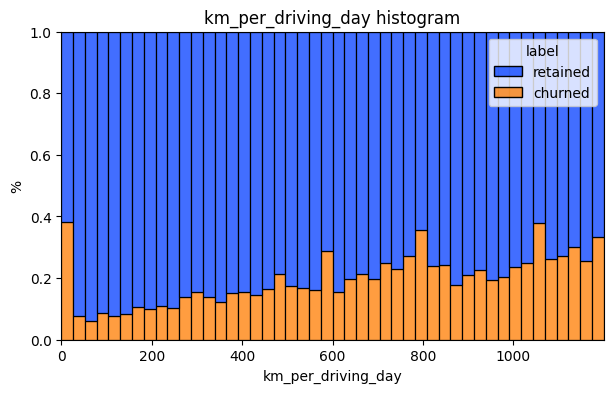

In [20]:
# Histogram
data_df = df[df["km_per_driving_day"]<=1200]
plt.figure(figsize=(7,4))
sns.histplot(data=data_df, x="km_per_driving_day", hue="label",  multiple="fill", palette="bright")
plt.ylabel('%')
plt.title('km_per_driving_day histogram');

#### **Churn rate per number of driving days**

This is a histogram showing the churn rate for each number of driving days. This shows that churn rate decreases as the number of driving days increase, meaning the users that use the app more are less likely to churn.  
- 40% of users that drove 0 days in the month churned
- 100% of users that drove every day of the month were retained


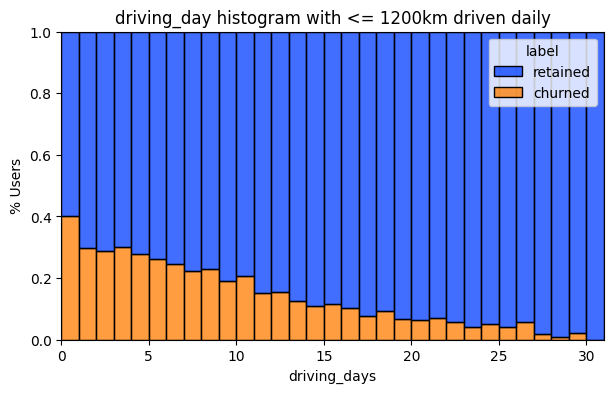

In [19]:
# Histogram
data_df = df[df["km_per_driving_day"]<=1200]
plt.figure(figsize=(7,4))
sns.histplot(data=data_df, x="driving_days", hue="label", bins=range(0,32), multiple="fill", palette="bright")
plt.ylabel('% Users')
plt.title('driving_day histogram with <= 1200km driven daily');

#### **New Column:** Proportion of sessions that occurred in the last month

This new column represents the portion of the total sessions that were done in the last month.

In [82]:
df["percent_sessions_in_last_month"] = df["sessions"]/df["total_sessions"]
df["percent_sessions_in_last_month"].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [83]:
df["percent_sessions_in_last_month"].median()

0.4243102549137284

##### Histogram 
The amount of churn is fairly consistent across all values of percent_sessions_in_last_month

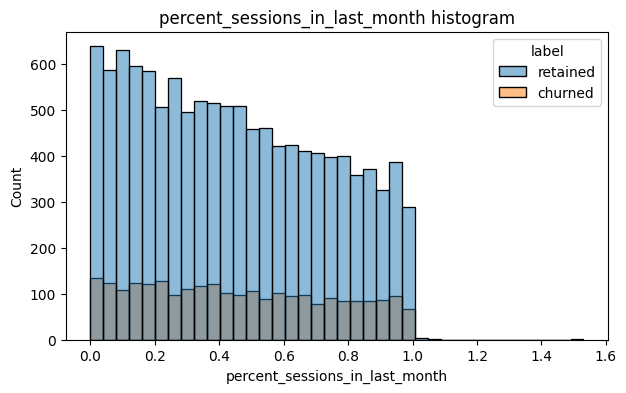

In [144]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="percent_sessions_in_last_month", hue="label")
plt.title('percent_sessions_in_last_month histogram');

#### **`n_days_after_onboarding`**

- Almost half of the users had 40%+ of their sessions in the last month
- Almost half the users have been a Waze user for 1749 days (4.79 yrs) or more. 

In [84]:
df["n_days_after_onboarding"].median()

1749.0

##### Histogram of `n_days_after_onboarding` 
for users with >= 40% of all sessions occuring in last month
- The churn rate is mostly unifirm for these users
- What happened this month that increased usership?

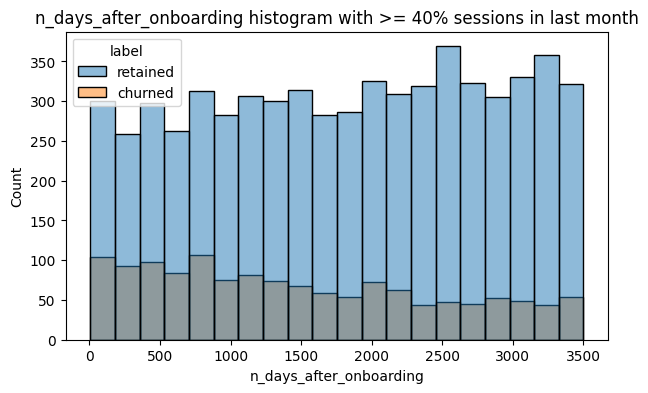

In [145]:
# Histogram
data_df = df[df["percent_sessions_in_last_month"]>=0.4]
plt.figure(figsize=(7,4))
sns.histplot(data=data_df, x="n_days_after_onboarding", hue="label")
plt.title('n_days_after_onboarding histogram with >= 40% sessions in last month');

### **2b. Handling outliers**

The box plots showed that many variables have outliers but these outliers probably aren't data entry errors due to their right-skewed distributions. The columns that will be imputed are: 
- `sessions`
- `drives`
- `total_sessions`
- `driven_km_drives`
- `duration_minutes_drives`

In [93]:
def impute_data_with_95percentile(df, col):
    """Accepts a Datafram and Column 
    Returns Dataframe with imputed values for data greater than the 95th percentile,
    with the 95th percentile value."""
    # Compute 95th percentile
    percentile95 = df[col].quantile(0.95)
    # replace values
    df.loc[df[col] > percentile95, col] = percentile95
    # Return Dataframe
    return df

In [94]:
impute_data_with_95percentile(df, "sessions")
impute_data_with_95percentile(df, "drives")
impute_data_with_95percentile(df, "total_sessions")
impute_data_with_95percentile(df, "driven_km_drives")
impute_data_with_95percentile(df, "duration_minutes_drives")

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0.288634
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0.223797
14996,14996,retained,243,200,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,0.646893
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0.825374


In [103]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,76.539688,63.964683,183.717304,1751.822505,121.747395,29.638296,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.449837
std,4331.207621,67.243178,55.127927,118.720520,1008.663834,147.713428,45.350890,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.286863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251
max,14998.000000,243.000000,200.000000,455.439492,3500.000000,1236.000000,415.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **3. Final Visualization**
Some visualizations to share what was learned.

#### Retention By Device

Text(0.5, 1.0, 'Retention by Device')

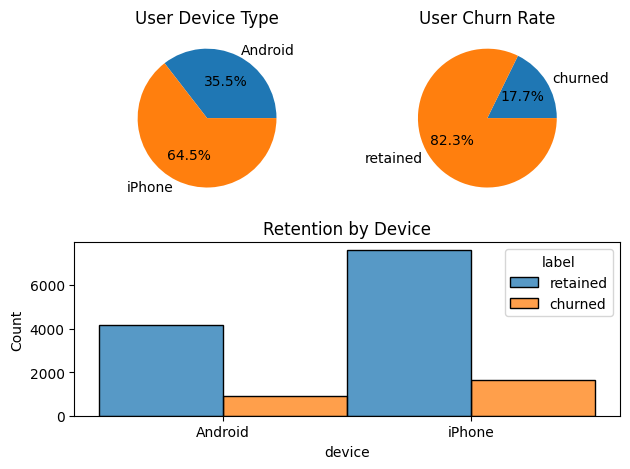

In [130]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(tight_layout=True)

ax = fig.add_subplot(gs[0, 0])
ax.pie(np.concatenate(devices.values), labels=devices.index, autopct='%1.1f%%')
ax.set_title('User Device Type')

ax = fig.add_subplot(gs[0, 1])
ax.pie(np.concatenate(label_df.values), labels=label_df.index, autopct='%1.1f%%')
ax.set_title('User Churn Rate')

ax = fig.add_subplot(gs[1, :])
sns.histplot(data=df, x="device", hue="label", multiple="dodge")
ax.set_title('Retention by Device')
plt.show()

#### Churn Rate in Users that Drove 1200 km per Driving Day or Less

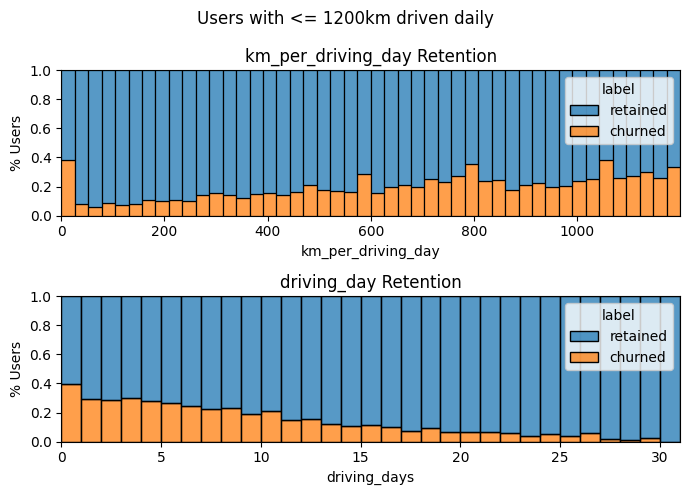

In [143]:
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(tight_layout=True, figsize=(7, 5))
fig.suptitle("Users with <= 1200km driven daily")
data_df = df[df["km_per_driving_day"]<=1200]

ax = fig.add_subplot(gs[0, 0])
sns.histplot(data=data_df, x="km_per_driving_day", hue="label",  multiple="fill")
ax.set_ylabel('% Users')
ax.set_title('km_per_driving_day Retention');

ax = fig.add_subplot(gs[1, 0])
sns.histplot(data=data_df, x="driving_days", hue="label", bins=range(0,32), multiple="fill")
ax.set_ylabel('% Users')
ax.set_title('driving_day Retention');

==> ENTER YOUR RESPONSE HERE

I have learned ....
- 17% of uers churn
- 35% of users are Android but the rate of churn is the same for Android and Iphone
- It seems the long distance drivers are more likely to churn
- The more days a user uses the app per month the more likely they are to stay

My other questions are ....
- Why might long distance drivers churn
- How can we get users using the app more often per month

My client would likely want to know ...
- What makes a user churn?
- How to predict a user may churn, so they can be retained?



### **4. Conclusion**

1. The overall churn rate is 17.7%.
2. 35.5% of users are Android but the rate of churn is similar for Android and Iphone.
3. It seems the long distance drivers are more likely to churn.
    -  `km_per_driving_day` seems to be positively correlated to churn.
4. The more days a user uses the app per month the more likely they are to continue using the app.
    - `driving_days` seems to be negatively correlated to churn.
5. The churn rate seems to be consistent across all user tenure durations. 
    - no preceived correlation between `n_days_after_onboarding` and churn.

#### Data Concerns

- Some of the data could be from different months since
    - `driving_days` has a max of 30, and 
    - `activity_days` has a max of of 31 

